#### <font color = 'blue'>Problema de Negócio: prever a  ocorrência de Diabetes em pacientes com acurácia igual ou maior que 70%.</font>

#### <font color = 'blue'>Base de Dados disponível em: https://www.kaggle.com/uciml/pima-indians-diabetes-database/data</font>

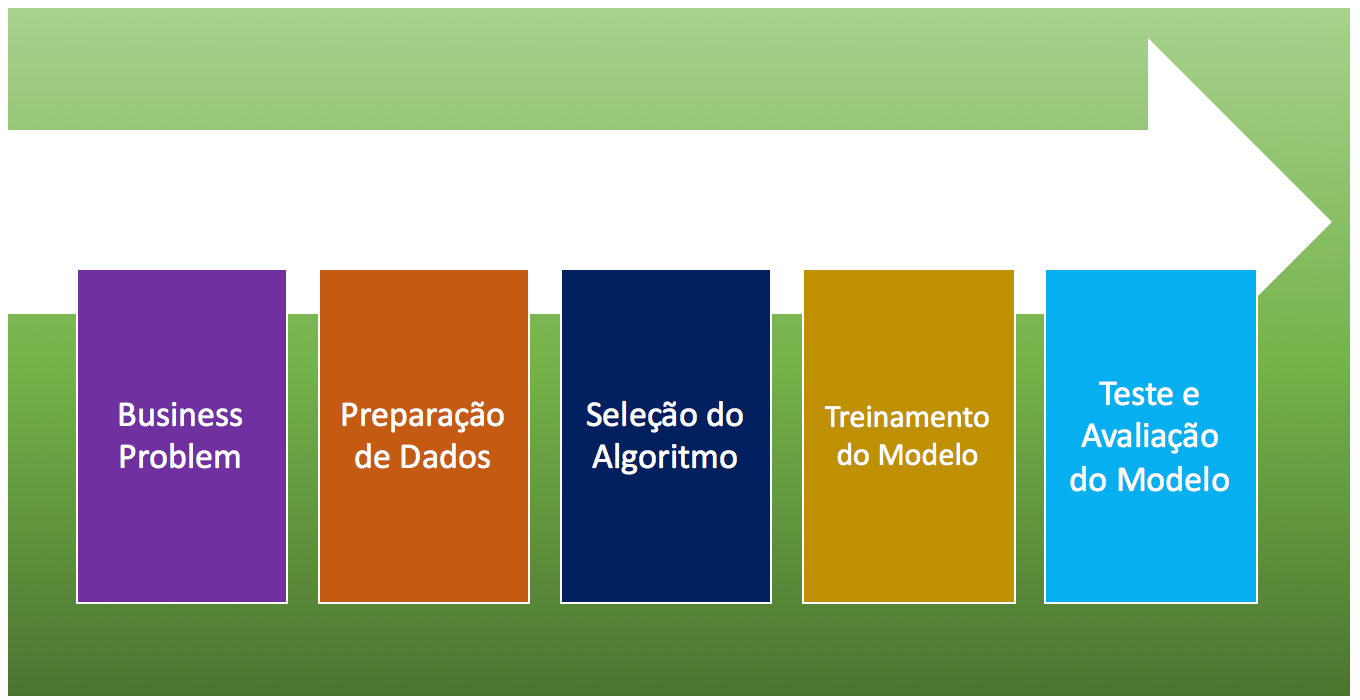

In [1]:
# Importar bibliotecas necessárias
import pandas as pd      
import matplotlib as mat
import matplotlib.pyplot as plt    
import numpy as np
import seaborn as sns
import sklearn as sk
# Comando para que as figuras geradas sejão incorporadas ao jupyter notebook
%matplotlib inline
from IPython.display import Image # Importar módulo
Image('workflow.png') # Apresentar imagem ao usuário

#### Pré-Processamento dos Dados

In [2]:
# Ler e carregar a base de dados
dados = 'pima_data.csv'
pacientes_df = pd.read_csv(dados, header = 0) # Criar dataframe

# Examinar a base de dados
linhas, colunas = pacientes_df.shape # Extrair tamanho da base de dados
print('A base de dados carregada possui {} linhas e {} colunas.'.format(linhas, colunas)) # Apresentar informação ao usuário
# display(pacientes_df) # Apresenta primeiras e últimas linhas da base de dados
pacientes_df.head(10) # Visualizar as 10 primeiras linhas da base de dados
# pacientes_df.tail(10) # Visualizar as 10 últimas linhas da base de dados

A base de dados carregada possui 768 linhas e 10 colunas.


,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3780,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True
5,5,116,74,0,0,25.6,0.201,30,0.0000,False
6,3,78,50,32,88,31.0,0.248,26,1.2608,True
7,10,115,0,0,0,35.3,0.134,29,0.0000,False
8,2,197,70,45,543,30.5,0.158,53,1.7730,True
9,8,125,96,0,0,0.0,0.232,54,0.0000,True


In [3]:
# Verificar se existe algum valor nulo na base de dados
if pacientes_df.isnull().values.any() == True:
    print('Existem dados nulos na base de dados carregada.')
elif pacientes_df.isnull().values.any() == False:
    print('Não existem dados nulos na base de dados carregada.')

Não existem dados nulos na base de dados carregada.


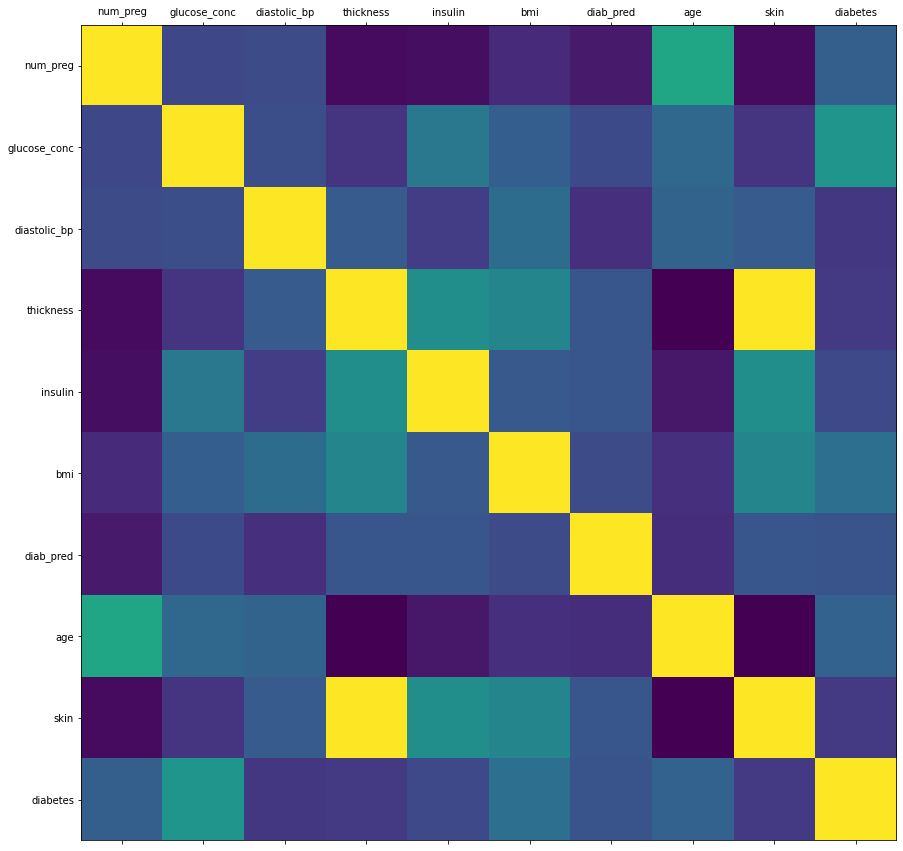

In [4]:
# Identificar a correlação entre as variáveis presentes na base de dados (correlação não implica causalidade)

def plot_corr(pcientes_df, size = 15): # Definir função para gerar o gráfico de correlação
    corr = pacientes_df.corr()    
    fig, ax = plt.subplots(figsize = (size, size))
    ax.matshow(corr)  
    plt.xticks(range(len(corr.columns)), corr.columns) 
    plt.yticks(range(len(corr.columns)), corr.columns) 

plot_corr(pacientes_df) # Apresentar gráfico de correlação ao usuário

In [5]:
# Visualizando a correlação em tabela
# Coeficiente de correlação: +1 (forte correlação positiva); 0 (não há correlação); -1 (forte correlação negativa)
pacientes_df.corr() # Apresentar coeficientes de correlação em formato de tabela ao usuário

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
num_preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,-0.081673,0.221898
glucose_conc,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.057326,0.466581
diastolic_bp,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.207371,0.065068
thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.436785,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.392574,0.292695
diab_pred,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.183927,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,-0.113973,0.238356
skin,-0.081673,0.057326,0.207371,1.000000,0.436785,0.392574,0.183927,-0.113973,1.000000,0.074750
diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,0.074750,1.000000


In [6]:
# Definir as classes do problema de negócio
diabetes_map = {True : 1, False : 0} # Mapear rótulos
pacientes_df['diabetes'] = pacientes_df['diabetes'].map(diabetes_map) # Aplicar o mapeamento a base de dados
pacientes_df.head(5) # Verificar as 5 primeiras linhas da base de dados para comfirmar o correto mapeamento das classes alvo

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3780,1
1,1,85,66,29,0,26.6,0.351,31,1.1426,0
2,8,183,64,0,0,23.3,0.672,32,0.0000,1
3,1,89,66,23,94,28.1,0.167,21,0.9062,0
4,0,137,40,35,168,43.1,2.288,33,1.3790,1


In [7]:
# Verificar a distribuição dos dados na base de dados
# O ideal é que a distribuição seja igual entre as classes
n_true = len(pacientes_df.loc[pacientes_df['diabetes'] == 1]) # Quantidade de rótulos da classe 1
n_false = len(pacientes_df.loc[pacientes_df['diabetes'] == 0]) # Quantidade de rótulos da classe 0
print('Número de Casos Verdadeiros (Classe 1): {} ({:.2%})'.format(n_true, (n_true/ (n_true + n_false))))
print('Número de Casos Falsos (Classe 0)     : {} ({:.2%})'.format(n_false, (n_false/ (n_true + n_false))))

Número de Casos Verdadeiros (Classe 1): 268 (34.90%)
Número de Casos Falsos (Classe 0)     : 500 (65.10%)


#### Dividir Dados para Treinamento e Validação

In [8]:
# Separar base de dados em 70% para dados de treino e 30% para dados de teste
from sklearn.model_selection import train_test_split # Importar módulo

# Seleção de variáveis preditoras (Inputs - Feature Selection)
atributos = ['num_preg', 'glucose_conc', 'diastolic_bp', 'thickness', 'insulin', 'bmi', 'diab_pred', 'age']

# Variável a ser predita (Output - Target)
target = ['diabetes']

# Criar variáveis de entrada (input) e saída (output)
X = pacientes_df[atributos].values
Y = pacientes_df[target].values

split_test_size = 0.30 # Definir a taxa percentual de dados reservado para etapa de teste

# Separar base de dados em dados de treino e dados de teste
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, test_size = split_test_size, random_state = 42)

# Verificar se a base de dados foi separada corretamente
print('{:0.2%} dos dados para treinamento.'.format((len(X_treino)/len(pacientes_df.index))))
print('{:0.2%} nos dados para validação.'.format((len(X_teste)/len(pacientes_df.index))))

69.92% dos dados para treinamento.
30.08% nos dados para validação.


In [9]:
# Verificar se a distribuição original presente na base dados continua igual nos dados de treino e de teste
print("Original Classe 1: {0} ({1:0.2%}).".format(len(pacientes_df.loc[pacientes_df['diabetes'] == 1]), 
                                       (len(pacientes_df.loc[pacientes_df['diabetes'] == 1])/len(pacientes_df.index))))

print("Original Classe 0: {0} ({1:0.2%}).".format(len(pacientes_df.loc[pacientes_df['diabetes'] == 0]), 
                                               (len(pacientes_df.loc[pacientes_df['diabetes'] == 0])/len(pacientes_df.index))))
print("")
print("Treino Classe 1: {0} ({1:0.2%}).".format(len(Y_treino[Y_treino[:] == 1]), 
                                      (len(Y_treino[Y_treino[:] == 1])/len(Y_treino))))

print("Treino Classe 0: {0} ({1:0.2%}).".format(len(Y_treino[Y_treino[:] == 0]), 
                                        (len(Y_treino[Y_treino[:] == 0])/len(Y_treino))))
print("")
print("Teste Classe 1: {0} ({1:0.2%}).".format(len(Y_teste[Y_teste[:] == 1]), 
                                    (len(Y_teste[Y_teste[:] == 1])/len(Y_teste))))

print("Teste Classe 0: {0} ({1:0.2%}).".format(len(Y_teste[Y_teste[:] == 0]), 
                                    (len(Y_teste[Y_teste[:] == 0])/len(Y_teste))))

Original Classe 1: 268 (34.90%).
Original Classe 0: 500 (65.10%).

Treino Classe 1: 188 (35.01%).
Treino Classe 0: 349 (64.99%).

Teste Classe 1: 80 (34.63%).
Teste Classe 0: 151 (65.37%).


#### Descobrir e Tratar Valores Missing (Faltantes) Ocultos na Base de Dados



In [10]:
# Valores que não representam a realidade corretamente, necessário analisar e conhecer bem os significados dos atributos
print("# Linhas no dataframe: {0}.".format(len(pacientes_df)))
print("# Linhas missing glucose_conc: {0}.".format(len(pacientes_df.loc[pacientes_df['glucose_conc'] == 0])))
print("# Linhas missing diastolic_bp: {0}.".format(len(pacientes_df.loc[pacientes_df['diastolic_bp'] == 0])))
print("# Linhas missing thickness: {0}.".format(len(pacientes_df.loc[pacientes_df['thickness'] == 0])))
print("# Linhas missing insulin: {0}.".format(len(pacientes_df.loc[pacientes_df['insulin'] == 0])))
print("# Linhas missing bmi: {0}.".format(len(pacientes_df.loc[pacientes_df['bmi'] == 0])))
print("# Linhas missing age: {0}.".format(len(pacientes_df.loc[pacientes_df['age'] == 0])))

from sklearn.impute import SimpleImputer # Importar módulo
# Substituir os valores iguais a zero, pela média dos dados em cada coluna
zero_imputer = SimpleImputer(missing_values = 0, strategy = "mean") # Solução simples para tratar os valores faltantes

# Substituindo os valores iguais a zero, pela média dos dados
X_treino = zero_imputer.fit_transform(X_treino) # Realizar imputação nos dados de treino
X_teste = zero_imputer.fit_transform(X_teste) # Realizar imputação nos dados de teste

# Linhas no dataframe: 768.
# Linhas missing glucose_conc: 5.
# Linhas missing diastolic_bp: 35.
# Linhas missing thickness: 227.
# Linhas missing insulin: 374.
# Linhas missing bmi: 11.
# Linhas missing age: 0.


#### <font color = 'red'>A Maior Parte do Tempo de Trabalho de um Cientista de Dados é Usado na Preparação dos Dados.</font>

#### Selecionar e Treinar o Modelo de Machine Learning

In [11]:
from sklearn.naive_bayes import GaussianNB # Importar classificador Naive Bayes
from sklearn.naive_bayes import ComplementNB # Importar classificador Naive Bayes described in Rennie et al. (2003).
from sklearn.preprocessing import MinMaxScaler # Importar método para escalonar dados dentro de um determinado intervalo

scaler = MinMaxScaler() # Instanciar método para pré-processar os dados
X_norm = scaler.fit_transform(X) # Aplicar transformação nos dados

# Separar base de dados em dados de treino e dados de teste
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, test_size = split_test_size, random_state = 42)

modelo_v1 = GaussianNB() # Criar o modelo
modelo_v1.fit(X_treino, Y_treino.ravel()) # Treinar o modelo
print('Modelo Treinado.')

Modelo Treinado.


#### Verificar a Acurácia do Modelo nos Dados de Treino

In [12]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix # Importar métricas para avaliação
from sklearn.metrics import classification_report, accuracy_score  # Importar métricas para avaliação
nb_predict_train = modelo_v1.predict(X_treino) # Predizer saídas usando os dados de treinamento
print("Precisão nos dados de treino (Accuracy): {0:.2%}.".format(accuracy_score(Y_treino, nb_predict_train)))

Precisão nos dados de treino (Accuracy): 76.72%.


#### Verificar a Acurácia no Modelo nos Dados de Teste

In [13]:
nb_predict_test = modelo_v1.predict(X_teste) # Predizer saídas usando os dados de validação
print("Precisão nos dados de teste (Accuracy): {0:.2%}.".format(accuracy_score(Y_teste, nb_predict_test)))

Precisão nos dados de teste (Accuracy): 74.46%.


#### Métricas Adotadas

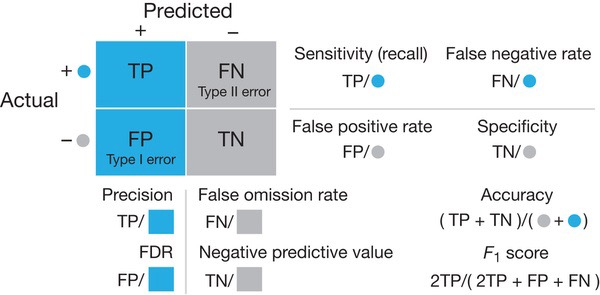

In [14]:
# from IPython.display import Image # Importar módulo
Image('confusion_matrix.jpg')

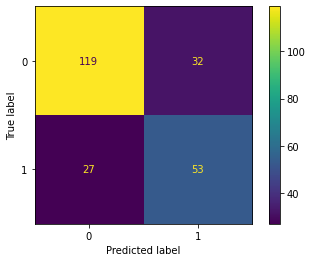

In [15]:
# Criar uma Confusion Matrix (Matriz de Confusão)
cm = confusion_matrix(Y_teste, nb_predict_test, labels = modelo_v1.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = modelo_v1.classes_)
disp.plot(), plt.show();

In [16]:
print("Classification Report") # Relatório sobre as classificações realizadas na base de teste
print(classification_report(Y_teste, nb_predict_test, labels = modelo_v1.classes_)) # Apresentar ao usuário

Classification Report
              precision    recall  f1-score   support

           0       0.82      0.79      0.80       151
           1       0.62      0.66      0.64        80

    accuracy                           0.74       231
   macro avg       0.72      0.73      0.72       231
weighted avg       0.75      0.74      0.75       231



#### Otimizar o Modelo agora usando Random Forest

In [17]:
from sklearn.ensemble import RandomForestClassifier # Importar classificador Random Forest
from sklearn.preprocessing import MinMaxScaler # Importar método para escalonar dados dentro de um determinado intervalo

scaler = MinMaxScaler() # Instanciar método para pré-processar os dados
X_norm = scaler.fit_transform(X) # Aplicar transformação nos dados

# Separar base de dados em dados de treino e dados de teste
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, test_size = split_test_size, random_state = 42)

modelo_v2 = RandomForestClassifier(n_estimators = 280, max_depth = None, max_leaf_nodes = 20, max_samples = None,
                                   criterion = 'gini', max_features = None, random_state = 42) # Criar o modelo
modelo_v2.fit(X_treino, Y_treino.ravel()) # Treinar o modelo
print('Modelo Treinado.')

Modelo Treinado.


In [18]:
# Verificar a Acurácia no Modelo nos Dados de Treino
rf_predict_train = modelo_v2.predict(X_treino) # Predizer saídas usando os dados de treinamento
print("Precisão nos dados de treino (Accuracy): {0:.2%}".format(accuracy_score(Y_treino, rf_predict_train)))

Precisão nos dados de treino (Accuracy): 91.81%


In [19]:
# Verificar a Acurácia no Modelo nos Dados de Teste
rf_predict_test = modelo_v2.predict(X_teste) # Predizer saídas usando os dados de validação
print("Precisão nos dados de teste (Accuracy): {0:.2%}".format(accuracy_score(Y_teste, rf_predict_test)))

Precisão nos dados de teste (Accuracy): 76.19%


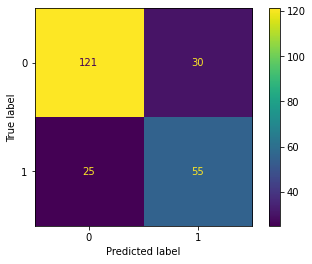

In [20]:
# Criar uma Confusion Matrix (Matriz de Confusão)
cm = confusion_matrix(Y_teste, rf_predict_test, labels = modelo_v2.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = modelo_v2.classes_)
disp.plot(), plt.show();

In [21]:
print("Classification Report") # Relatório sobre as classificações realizadas na base de teste
print(classification_report(Y_teste, rf_predict_test, labels = modelo_v2.classes_)) # Apresentar ao usuário

Classification Report
              precision    recall  f1-score   support

           0       0.83      0.80      0.81       151
           1       0.65      0.69      0.67        80

    accuracy                           0.76       231
   macro avg       0.74      0.74      0.74       231
weighted avg       0.77      0.76      0.76       231



#### Otimizar o Modelo agora usando Regressão Logística

In [22]:
from sklearn.linear_model import LogisticRegression # Importar classificador Logistic Regression
from sklearn.preprocessing import MinMaxScaler # Importar método para escalonar dados dentro de um determinado intervalo

scaler = MinMaxScaler() # Instanciar método para pré-processar os dados
X_norm = scaler.fit_transform(X) # Aplicar transformação nos dados

# Separar base de dados em dados de treino e dados de teste
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X_norm, Y, test_size = split_test_size, random_state = 42)

modelo_v3 = LogisticRegression(C = 0.7, random_state = 42, max_iter = 1000) # Criar o modelo
modelo_v3.fit(X_treino, Y_treino.ravel()) # Treinar o modelo
print('Modelo Treinado.')

Modelo Treinado.


In [23]:
# Verificar a Acurácia no Modelo nos Dados de Treino
lr_predict_train = modelo_v3.predict(X_treino) # Predizer saídas usando os dados de treinamento
print("Precisão nos dados de treino (Accuracy): {0:.2%}".format(accuracy_score(Y_treino, lr_predict_train)))

Precisão nos dados de treino (Accuracy): 76.72%


In [24]:
# Verificar a Acurácia no Modelo nos Dados de Teste
lr_predict_test = modelo_v3.predict(X_teste) # Predizer saídas usando os dados de validação
print("Precisão nos dados de teste (Accuracy): {0:.2%}".format(accuracy_score(Y_teste, lr_predict_test)))

Precisão nos dados de teste (Accuracy): 76.19%


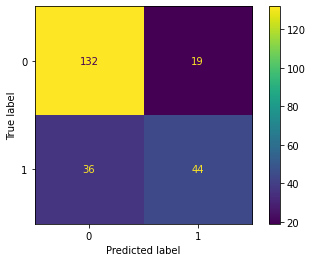

In [25]:
# Criar uma Confusion Matrix (Matriz de Confusão)
cm = confusion_matrix(Y_teste, lr_predict_test, labels = modelo_v3.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = modelo_v3.classes_)
disp.plot(), plt.show();

In [26]:
print("Classification Report") # Relatório sobre as classificações realizadas na base de teste
print(classification_report(Y_teste, lr_predict_test, labels = modelo_v3.classes_)) # Apresentar ao usuário

Classification Report
              precision    recall  f1-score   support

           0       0.79      0.87      0.83       151
           1       0.70      0.55      0.62        80

    accuracy                           0.76       231
   macro avg       0.74      0.71      0.72       231
weighted avg       0.76      0.76      0.75       231



#### Otimizar o Modelo agora usando SVM (Support Vector Machine)

In [27]:
from sklearn.svm import SVC # Importar classificador Support Vector Machine
from sklearn.preprocessing import MinMaxScaler # Importar método para escalonar dados dentro de um determinado intervalo

scaler = MinMaxScaler() # Instanciar método para pré-processar os dados
X_norm = scaler.fit_transform(X) # Aplicar transformação nos dados

# Separar base de dados em dados de treino e dados de teste
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X_norm, Y, test_size = split_test_size, random_state = 42)

modelo_v4 = SVC(C = 2) # Criar o modelo
# modelo_v4 = svm.NuSVC(gamma = 'scale') # Criar o modelo
modelo_v4.fit(X_treino, Y_treino.ravel()) # Treinar o modelo
print('Modelo Treinado.')

Modelo Treinado.


In [28]:
# Verificar a Acurácia no Modelo nos Dados de Treino
svm_predict_train = modelo_v4.predict(X_treino) # Predizer saídas usando os dados de treinamento
print("Precisão nos dados de treino (Accuracy): {0:.2%}".format(accuracy_score(Y_treino, svm_predict_train)))

Precisão nos dados de treino (Accuracy): 80.07%


In [29]:
# Verificar a Acurácia no Modelo nos Dados de Teste
svm_predict_test = modelo_v4.predict(X_teste) # Predizer saídas usando os dados de validação
print("Precisão nos dados de teste (Accuracy): {0:.2%}".format(accuracy_score(Y_teste, svm_predict_test)))

Precisão nos dados de teste (Accuracy): 75.32%


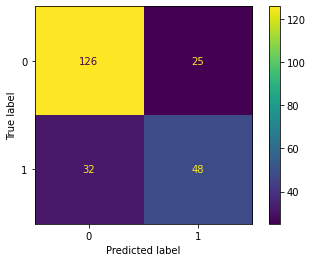

In [30]:
# Criar uma Confusion Matrix (Matriz de Confusão)
cm = confusion_matrix(Y_teste, svm_predict_test, labels = modelo_v4.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = modelo_v4.classes_)
disp.plot(), plt.show();

In [31]:
print("Classification Report") # Relatório sobre as classificações realizadas na base de teste
print(classification_report(Y_teste, svm_predict_test, labels = modelo_v4.classes_)) # Apresentar ao usuário

Classification Report
              precision    recall  f1-score   support

           0       0.80      0.83      0.82       151
           1       0.66      0.60      0.63        80

    accuracy                           0.75       231
   macro avg       0.73      0.72      0.72       231
weighted avg       0.75      0.75      0.75       231



#### Otimizar o Modelo agora usando KNN (K-Nearest Neighbor)

In [32]:
from sklearn.neighbors import KNeighborsClassifier # Importar classificador K-Nearest Neighbor
from sklearn.preprocessing import MinMaxScaler # Importar método para escalonar dados dentro de um determinado intervalo

scaler = MinMaxScaler() # Instanciar método para pré-processar os dados
X_norm = scaler.fit_transform(X) # Aplicar transformação nos dados

# Separar base de dados em dados de treino e dados de teste
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, test_size = split_test_size, random_state = 42)

modelo_v5 = KNeighborsClassifier(n_neighbors = 20, weights = 'distance') # Criar o modelo
modelo_v5.fit(X_treino, Y_treino.ravel()) # Treinar o modelo
print('Modelo Treinado.')

Modelo Treinado.


In [33]:
# Verificar a Acurácia no Modelo nos Dados de Treino
knn_predict_train = modelo_v5.predict(X_treino) # Predizer saídas usando os dados de treinamento
print("Precisão nos dados de treino (Accuracy): {0:.2%}".format(accuracy_score(Y_treino, knn_predict_train)))

Precisão nos dados de treino (Accuracy): 100.00%


In [34]:
# Verificar a Acurácia no Modelo nos Dados de Teste
knn_predict_test = modelo_v5.predict(X_teste) # Predizer saídas usando os dados de validação
print("Precisão nos dados de teste (Accuracy): {0:.2%}".format(accuracy_score(Y_teste, knn_predict_test)))

Precisão nos dados de teste (Accuracy): 72.73%


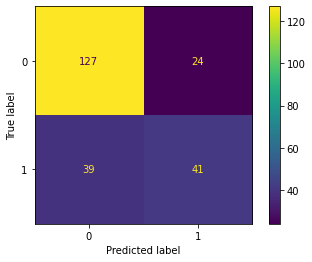

In [35]:
# Criar uma Confusion Matrix (Matriz de Confusão)
cm = confusion_matrix(Y_teste, knn_predict_test, labels = modelo_v5.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = modelo_v5.classes_)
disp.plot(), plt.show();

In [36]:
print("Classification Report") # Relatório sobre as classificações realizadas na base de teste
print(classification_report(Y_teste, knn_predict_test, labels = modelo_v5.classes_)) # Apresentar ao usuário

Classification Report
              precision    recall  f1-score   support

           0       0.77      0.84      0.80       151
           1       0.63      0.51      0.57        80

    accuracy                           0.73       231
   macro avg       0.70      0.68      0.68       231
weighted avg       0.72      0.73      0.72       231



#### Otimizar o Modelo agora usando Gradient Boosting Classifier (GBC)

In [37]:
from sklearn.ensemble import GradientBoostingClassifier # Importar classificador Gradient Boosting Classifier
from sklearn.preprocessing import MinMaxScaler # Importar método para escalonar dados dentro de um determinado intervalo

scaler = MinMaxScaler() # Instanciar método para pré-processar os dados
X_norm = scaler.fit_transform(X) # Aplicar transformação nos dados

# Separar base de dados em dados de treino e dados de teste
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X_norm, Y, test_size = split_test_size, random_state = 42)

modelo_v6 = GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.1,
                                       max_depth = 1, random_state = 42) # Criar o modelo
modelo_v6.fit(X_treino, Y_treino.ravel()) # Treinar o modelo
print('Modelo Treinado.')

Modelo Treinado.


In [38]:
# Verificar a Acurácia no Modelo nos Dados de Treino
gbc_predict_train = modelo_v6.predict(X_treino) # Predizer saídas usando os dados de treinamento
print("Precisão nos dados de treino (Accuracy): {0:.2%}".format(accuracy_score(Y_treino, gbc_predict_train)))

Precisão nos dados de treino (Accuracy): 79.33%


In [39]:
# Verificar a Acurácia no Modelo nos Dados de Teste
gbc_predict_test = modelo_v6.predict(X_teste) # Predizer saídas usando os dados de validação
print("Precisão nos dados de teste (Accuracy): {0:.2%}".format(accuracy_score(Y_teste, gbc_predict_test)))

Precisão nos dados de teste (Accuracy): 76.62%


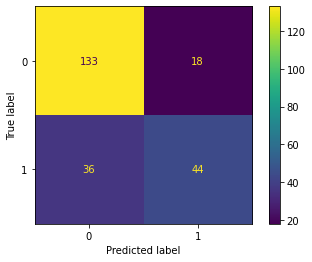

In [40]:
# Criar uma Confusion Matrix (Matriz de Confusão)
cm = confusion_matrix(Y_teste, gbc_predict_test, labels = modelo_v6.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = modelo_v6.classes_)
disp.plot(), plt.show();

In [41]:
print("Classification Report") # Relatório sobre as classificações realizadas na base de teste
print(classification_report(Y_teste, gbc_predict_test, labels = modelo_v6.classes_)) # Apresentar ao usuário

Classification Report
              precision    recall  f1-score   support

           0       0.79      0.88      0.83       151
           1       0.71      0.55      0.62        80

    accuracy                           0.77       231
   macro avg       0.75      0.72      0.73       231
weighted avg       0.76      0.77      0.76       231



#### Otimizar o Modelo agora usando Extreme Gradient Boosting (XGBoost)

In [43]:
from xgboost import XGBClassifier # Importar classificador Extreme Gradient Boosting
from sklearn.preprocessing import MinMaxScaler # Importar método para escalonar dados dentro de um determinado intervalo

scaler = MinMaxScaler() # Instanciar método para pré-processar os dados
X_norm = scaler.fit_transform(X) # Aplicar transformação nos dados

# Separar base de dados em dados de treino e dados de teste
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X_norm, Y, test_size = split_test_size, random_state = 42)

modelo_v7 = XGBClassifier(n_estimators = 50, objective = 'reg:logistic', eval_metric = 'logloss',
                          colsample_bytree = 0.3, learning_rate = 0.1, use_label_encoder = False,
                          max_depth = 1, reg_alpha = 5, reg_lambda = 1, booster = 'dart', seed = 0) # Criar o modelo
modelo_v7.fit(X_treino, Y_treino.ravel()) # Treinar o modelo
print('Modelo Treinado.')

Modelo Treinado.


In [44]:
# Verificar a Acurácia no Modelo nos Dados de Treino
xgb_predict_train = modelo_v7.predict(X_treino) # Predizer saídas usando os dados de treinamento
print("Precisão nos dados de treino (Accuracy): {0:.2%}".format(accuracy_score(Y_treino, xgb_predict_train)))

Precisão nos dados de treino (Accuracy): 78.58%


In [45]:
# Verificar a Acurácia no Modelo nos Dados de Teste
xgb_predict_test = modelo_v7.predict(X_teste) # Predizer saídas usando os dados de validação
print("Precisão nos dados de teste (Accuracy): {0:.2%}".format(accuracy_score(Y_teste, xgb_predict_test)))

Precisão nos dados de teste (Accuracy): 76.62%


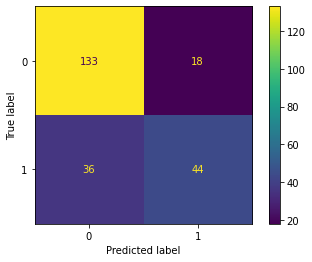

In [46]:
# Criar uma Confusion Matrix (Matriz de Confusão)
cm = confusion_matrix(Y_teste, xgb_predict_test, labels = modelo_v7.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = modelo_v7.classes_)
disp.plot(), plt.show();

In [47]:
print("Classification Report") # Relatório sobre as classificações realizadas na base de teste
print(classification_report(Y_teste, xgb_predict_test, labels = modelo_v7.classes_)) # Apresentar ao usuário

Classification Report
              precision    recall  f1-score   support

           0       0.79      0.88      0.83       151
           1       0.71      0.55      0.62        80

    accuracy                           0.77       231
   macro avg       0.75      0.72      0.73       231
weighted avg       0.76      0.77      0.76       231



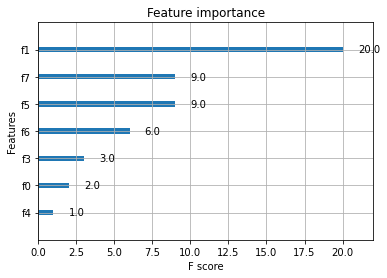

In [58]:
# Uma maneira simples de fazer isso envolve contar o número de vezes que cada atributo é dividido em todas as árvores
# presentes no modelo e, em seguida, visualizar o resultado como um gráfico de barras, com os atributos ordenados
# de acordo com quantas vezes eles aparecem.
import xgboost as xgb # Importar a biblioteca necessária
xgb.plot_importance(modelo_v7) # Calcula a importância de cada atributo de entrada para o modelo
plt.rcParams['figure.figsize'] = [5, 5];
plt.show() # Apresenta gráfico de importância de cada atributo para o modelo

#### Otimizar o Modelo agora usando Artificial Neural Network (ANN)

In [48]:
from sklearn.neural_network import MLPClassifier # Importar classificador Multilayer Perceptron
from sklearn.preprocessing import MinMaxScaler # Importar método para escalonar dados dentro de um determinado intervalo

scaler = MinMaxScaler() # Instanciar método para pré-processar os dados
X_norm = scaler.fit_transform(X) # Aplicar transformação nos dados

# Separar base de dados em dados de treino e dados de teste
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X_norm, Y, test_size = split_test_size, random_state = 42)

modelo_v8 = MLPClassifier(hidden_layer_sizes = (32, ), batch_size = 32, learning_rate_init = 0.001, activation = 'relu',
                          solver = 'adam', learning_rate = 'constant', max_iter = 1000, random_state = 42) # Criar o modelo
modelo_v8.fit(X_treino, Y_treino.ravel()) # Treinar o modelo
print('Modelo Treinado.')

Modelo Treinado.


In [49]:
# Verificar a Acurácia no Modelo nos Dados de Treino
ann_predict_train = modelo_v8.predict(X_treino) # Predizer saídas usando os dados de treinamento
print("Precisão nos dados de treino (Accuracy): {0:.2%}".format(accuracy_score(Y_treino, ann_predict_train)))

Precisão nos dados de treino (Accuracy): 80.45%


In [50]:
# Verificar a Acurácia no Modelo nos Dados de Teste
ann_predict_test = modelo_v8.predict(X_teste) # Predizer saídas usando os dados de validação
print("Precisão nos dados de teste (Accuracy): {0:.2%}".format(accuracy_score(Y_teste, ann_predict_test)))

Precisão nos dados de teste (Accuracy): 77.06%


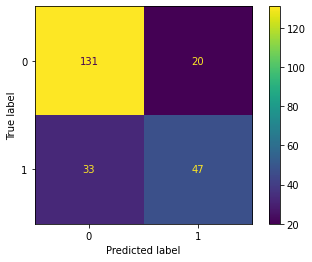

In [51]:
# Criar uma Confusion Matrix (Matriz de Confusão)
cm = confusion_matrix(Y_teste, ann_predict_test, labels = modelo_v8.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = modelo_v8.classes_)
disp.plot(), plt.show();

In [52]:
print("Classification Report") # Relatório sobre as classificações realizadas na base de teste
print(classification_report(Y_teste, ann_predict_test, labels = modelo_v8.classes_)) # Apresentar ao usuário

Classification Report
              precision    recall  f1-score   support

           0       0.80      0.87      0.83       151
           1       0.70      0.59      0.64        80

    accuracy                           0.77       231
   macro avg       0.75      0.73      0.74       231
weighted avg       0.77      0.77      0.77       231



#### Otimizar o Modelo agora usando Decision Tree (DT)

In [53]:
from sklearn.tree import DecisionTreeClassifier # Importar classificador Decision Tree
from sklearn.preprocessing import MinMaxScaler # Importar método para escalonar dados dentro de um determinado intervalo

scaler = MinMaxScaler() # Instanciar método para pré-processar os dados
X_norm = scaler.fit_transform(X) # Aplicar transformação nos dados

# Separar base de dados em dados de treino e dados de teste
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, test_size = split_test_size, random_state = 42)

modelo_v9 = DecisionTreeClassifier(max_depth = 10, max_leaf_nodes = 40, max_features = None,
                                   criterion = 'gini', random_state = 42) # Criar o modelo
modelo_v9.fit(X_treino, Y_treino.ravel()) # Treinar o modelo
print('Modelo Treinado.')

Modelo Treinado.


In [54]:
# Verificar a Acurácia no Modelo nos Dados de Treino
dt_predict_train = modelo_v9.predict(X_treino) # Predizer saídas usando os dados de treinamento
print("Precisão nos dados de treino (Accuracy): {0:.2%}".format(accuracy_score(Y_treino, dt_predict_train)))

Precisão nos dados de treino (Accuracy): 92.92%


In [55]:
# Verificar a Acurácia no Modelo nos Dados de Teste
dt_predict_test = modelo_v9.predict(X_teste) # Predizer saídas usando os dados de validação
print("Precisão nos dados de teste (Accuracy): {0:.2%}".format(accuracy_score(Y_teste, dt_predict_test)))

Precisão nos dados de teste (Accuracy): 73.16%


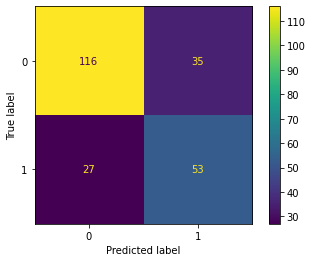

In [56]:
# Criar uma Confusion Matrix (Matriz de Confusão)
cm = confusion_matrix(Y_teste, dt_predict_test, labels = modelo_v9.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = modelo_v9.classes_)
disp.plot(), plt.show();

In [57]:
print("Classification Report") # Relatório sobre as classificações realizadas na base de teste
print(classification_report(Y_teste, dt_predict_test, labels = modelo_v9.classes_)) # Apresentar ao usuário

Classification Report
              precision    recall  f1-score   support

           0       0.81      0.77      0.79       151
           1       0.60      0.66      0.63        80

    accuracy                           0.73       231
   macro avg       0.71      0.72      0.71       231
weighted avg       0.74      0.73      0.73       231



#### Otimizar o Modelo agora usando Adaptive Boosting (AdaBoost)

In [132]:
from sklearn.ensemble import AdaBoostClassifier # Importar classififcador Adaptive Boosting
from sklearn.preprocessing import MinMaxScaler # Importar método para escalonar dados dentro de um determinado intervalo

scaler = MinMaxScaler() # Instanciar método para pré-processar os dados
X_norm = scaler.fit_transform(X) # Aplicar transformação nos dados

# Separar base de dados em dados de treino e dados de teste
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, test_size = split_test_size, random_state = 42)

modelo_v10 = AdaBoostClassifier(n_estimators = 15, learning_rate = 1.0, random_state = 42) # Criar o modelo
modelo_v10.fit(X_treino, Y_treino.ravel()) # Treinar o modelo
print('Modelo Treinado.')

Modelo Treinado.


In [133]:
# Verificar a Acurácia no Modelo nos Dados de Treino
ada_predict_train = modelo_v10.predict(X_treino) # Predizer saídas usando os dados de treinamento
print("Precisão nos dados de treino (Accuracy): {0:.2%}".format(accuracy_score(Y_treino, ada_predict_train)))

Precisão nos dados de treino (Accuracy): 81.94%


In [134]:
# Verificar a Acurácia no Modelo nos Dados de Teste
ada_predict_test = modelo_v10.predict(X_teste) # Predizer saídas usando os dados de validação
print("Precisão nos dados de teste (Accuracy): {0:.2%}".format(accuracy_score(Y_teste, ada_predict_test)))

Precisão nos dados de teste (Accuracy): 77.92%


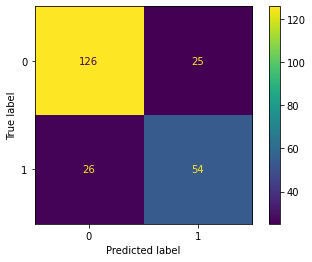

In [135]:
# Criar uma Confusion Matrix (Matriz de Confusão)
cm = confusion_matrix(Y_teste, ada_predict_test, labels = modelo_v10.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = modelo_v10.classes_)
disp.plot(), plt.show();

In [136]:
print("Classification Report") # Relatório sobre as classificações realizadas na base de teste
print(classification_report(Y_teste, ada_predict_test, labels = modelo_v10.classes_)) # Apresentar ao usuário

Classification Report
              precision    recall  f1-score   support

           0       0.83      0.83      0.83       151
           1       0.68      0.68      0.68        80

    accuracy                           0.78       231
   macro avg       0.76      0.75      0.76       231
weighted avg       0.78      0.78      0.78       231



#### <font color = 'red'>Resumo dos Resultados Obtidos (Acurácia) para cada Modelo de Machine Learning Treinado:</font>

* Modelo usando algoritmo Naive Bayes = 74,46%
* Modelo usando algoritmo Random Forest = 76,19%
* Modelo usando algoritmo Logistic Regression = 76,19%
* Modelo usando algoritmo Support Vector Machine = 75,32%
* Modelo usando algoritmo K-Nearest Neighbor = 72,73%
* Modelo usando algoritmo Gradient Boosting Classifier: 76,62%
* Modelo usando algoritmo Extreme Gradient Boosting: 76,62%
* Modelo usando algoritmo Artificial Neural Network: 77,06%
* Modelo usando algoritmo Decision Tree = 77,16%
* Modelo usando algoritmo Adaptive Boosting = 77,92%

#### Fazer Predições com o Modelo Treinado Selecionado

In [56]:
import pickle # Importar biblioteca
# Salvar o modelo selecionado como mais adequado
filename = 'modelo_selecionado.sav' # Nome do arquivo a ser salvo no computador
pickle.dump(modelo_v8, open(filename, 'wb')) # Salvar o arquivo no diretório do computador

In [57]:
# Carregar o modelo e fazer predições com novos conjuntos de dados 
# X_teste, Y_teste devem ser novos conjuntos de dados preparados com o procedimento de limpeza e transformação adequados
loaded_model = pickle.load(open(filename, 'rb'))
teste01_norm = scaler.transform(X_teste[15].reshape(1, -1))
teste02_norm = scaler.transform(X_teste[18].reshape(1, -1))
resultado1 = loaded_model.predict(teste01_norm) # Aplicar transformação nos dados de entrada (caso necessário)
resultado2 = loaded_model.predict(teste02_norm) # Aplicar transformação nos dados de entrada (caso necessário)
resultado1 = resultado1.astype(str)
resultado2 = resultado2.astype(str)
print(f'A predição do modelo para os dados de entrada é {resultado1[0]}.')
print(f'A predição do modelo para os dados de entrada é {resultado2[0]}.')

A predição do modelo para os dados de entrada é 0.
A predição do modelo para os dados de entrada é 0.


#### Fim da Rotina